In [24]:
# Преоразовать существующий код для распознавания последовательности рукописных символов в текст.
# Написать генератор произвольной последовательности рукописных символов.

# ГЕНЕРАЦИЯ НАБОРА ДАННЫХ
# Сгенерировать набор текстовых строк из допустимых символов.
# Каждому набору поставить в соотвествие массив изоражений соответствующих символов.
# Добавить пробелы для разделения слов, символы пробелов не использовать во время классификации.

# КЛАССИФИКАЦИЯ (k ближайших соседей)
# Часть символов оставить для обучения классификатора . Остальные  классифицировать
# по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.
# Выбрать оптимальный классификатор в зависимости от k- количество соседей.
# Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

# РАСПОЗНАВАНИЕ
# Итак, к данному этапу Вы из массива изображений "восстановили" текст.
# Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.
# Рассчитайте метрику CER.
import os
import random
import numpy as np
from PIL import Image
from IPython.display import display
import cv2 
import imutils
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from matplotlib import pyplot as plt

# Генерация набора данных

### Сгенерировать набор текстовых строк из допустимых символов.

In [25]:
base_dir = 'data'
count = 10

characters = [character if character != 'times' else '*' for character in os.listdir(base_dir)]

def generate_rand_strs(count, chars):
    return [ ''.join(random.choices(chars, k=count)) for _ in range(count) ]

rand_strs = generate_rand_strs(count, characters)
rand_strs

[',5(-Xw9h(y',
 ')6X(X)y(2w',
 ',yh009X+Xw',
 '*09*t012)0',
 '4h)4-y907y',
 '-t*)6w5768',
 '9tX2*-X3ht',
 '9tXX()4w42',
 '(2,*y1(-(+',
 '0,)8w+1+X(']


### Каждому набору поставить в соотвествие массив изоражений соответствующих символов.

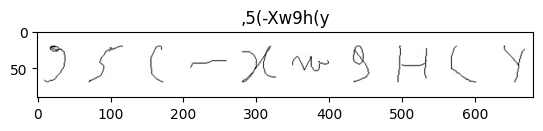

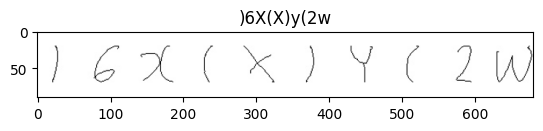

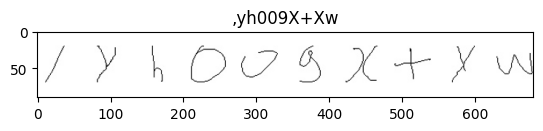

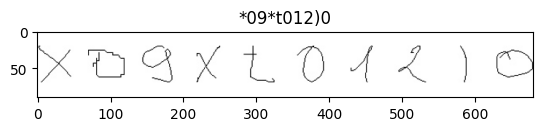

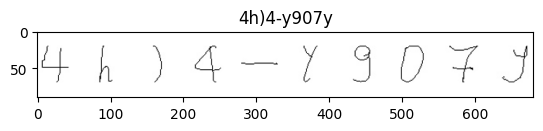

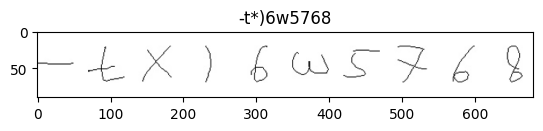

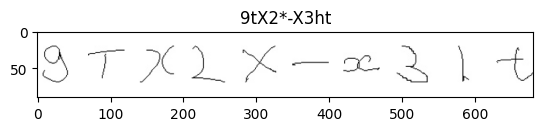

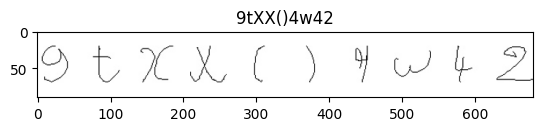

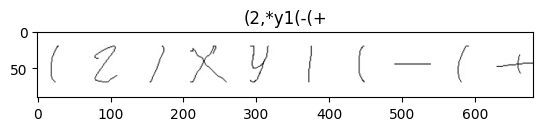

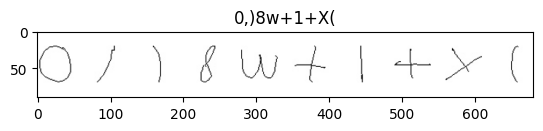

In [26]:
def get_imgs_of_chars(chars):
    images = {}

    for char in chars:
        images[char] = []
        folder = base_dir + f'/{char if char != '*' else 'times'}/'
        images[char] = [ folder + img_file for img_file in os.listdir(folder)]
    
    return images


def map_strs_to_imgs(strs, imgs):
    strs_mapped = {}

    for string in strs:
        strs_mapped[string] = [Image.open(random.choice(imgs[char])).convert('RGB') for char in string]

    return strs_mapped

def create_image_from_str(mapped_str, space=20, height=50, width=50):
    white = (255, 255, 255) 
    total_width = len(mapped_str) * (width + space) - space 
    composite_height = height + 2 * space  

    
    image = Image.new('RGB', (total_width, composite_height), white)

    
    for i, img in enumerate(mapped_str):
        img = img.resize((width, height)) 
        x_offset = i * (width + space)
        y_offset = space
        image.paste(img, (x_offset, y_offset))
    
    return image


images = get_imgs_of_chars(characters)

mapped = map_strs_to_imgs(rand_strs, images)

for rand in rand_strs:
    plt.title(f'{rand}')
    plt.imshow(create_image_from_str(mapped[rand]))
    plt.show()


# КЛАССИФИКАЦИЯ (k ближайших соседей)

### Часть символов оставить для обучения классификатора.
Остальные  классифицировать по аналогии с примером mnist с прошлого занятия. Т.е. преобразовывать изображение в вектор.

In [27]:
def get_X_y(imgs):
    X, y = [], []
    for char in imgs:
        X.extend(list(map(lambda img: np.array(Image.open(img).convert('RGB').resize((50, 50))).flatten(), imgs[char][:len(imgs[char]) // 2])))
        y.extend([char for _ in range(len(imgs[char]) // 2)])

    return X, y

X, y = get_X_y(images)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [28]:
print(len(X), len(y))

112642 112642



### Выбрать оптимальный классификатор в зависимости от k- количество соседей.
Метрика для измерения точности классификации, и выбора оптимального классификатора относительно параметра k - accuracy.

In [29]:
def find_optimal_k(X_train, y_train, range=list(range(1, 5))):
    grid_param = {'n_neighbors': range}
    grid_search_cv = GridSearchCV(KNeighborsClassifier(), grid_param, cv=5, scoring='accuracy', n_jobs=2)
    grid_search_cv.fit(X_train, y_train)

    return grid_search_cv.best_params_['n_neighbors']

opt_k = find_optimal_k(X_train, y_train)

opt_k


1

In [30]:
# first time exec
import joblib

knn = KNeighborsClassifier(n_neighbors=opt_k)
knn.fit(X_train, y_train)
joblib.dump(knn, 'model/knn.pkl')

['model/knn.pkl']

In [31]:
knn = joblib.load('model/knn.pkl')


In [32]:
pred_y = knn.predict(X_test)
accuracy = accuracy_score(y_test, pred_y)
accuracy

0.8830370419690614

# Генерация набора данных

### Случайно удалите некоторые символы,и случайно добавьте символы в результат распознавания.

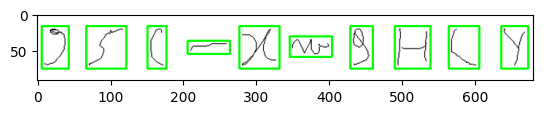

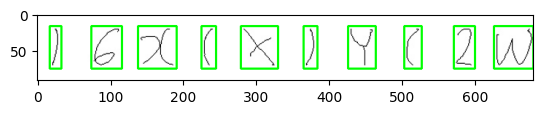

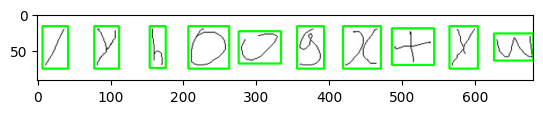

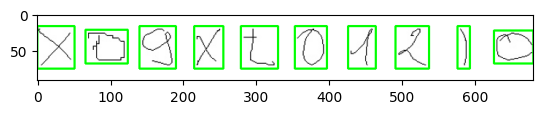

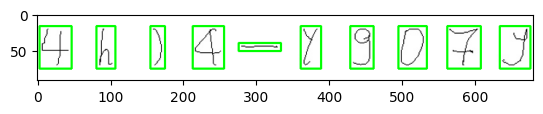

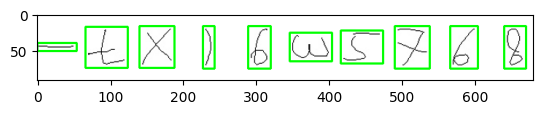

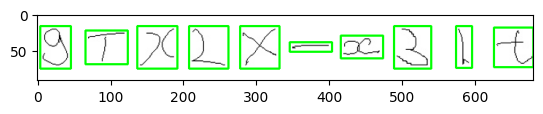

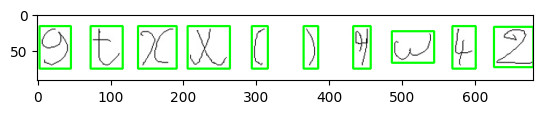

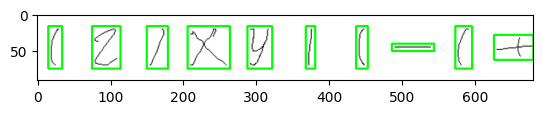

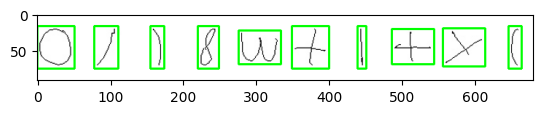

['0', 't', '0', '2', ',', '2', '5', 'h', '2', '7', '2', '6', ',', '(', '2', '2', '7', '2', '2', 't', ',', 'X', 't', '7', '0', '2', ',', '1', '-', '1', ',', '(', '2', '2', 't', '(', '7', '2', '+', '0', '-', '4', '0', '+', '5', '2', '0', '2', '7', '7', '5', 't', '-', '2', '(', 't', '(', '-', ',', '2', '2', 't', ',', '2', '2', '2', '2', '2', 't', 't', '0', '(', 't', '(', '(', '0', '7', '7', 't', '2', '6', '-', '7', '2', '7', '2', '(', '5', '0', '-', '7', '2', ')', '2', '7', '+', 'w', '+', '2', '2']
[',', '5', '(', '-', 'X', 'w', '9', 'h', '(', 'y', ')', '6', 'X', '(', 'X', ')', 'y', '(', '2', 'w', ',', 'y', 'h', '0', '0', '9', 'X', '+', 'X', 'w', '*', '0', '9', '*', 't', '0', '1', '2', ')', '0', '4', 'h', ')', '4', '-', 'y', '9', '0', '7', 'y', '-', 't', '*', ')', '6', 'w', '5', '7', '6', '8', '9', 't', 'X', '2', '*', '-', 'X', '3', 'h', 't', '9', 't', 'X', 'X', '(', ')', '4', 'w', '4', '2', '(', '2', ',', '*', 'y', '1', '(', '-', '(', '+', '0', ',', ')', '8', 'w', '+', '1', '+', 'X', '('

In [36]:
def result(image, model):
    image = np.array(image)

    new_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    new_image = cv2.threshold(new_image, 128, 255, cv2.THRESH_BINARY_INV)[1]
    new_image = cv2.GaussianBlur(new_image, (7, 7), 5)
    new_image = cv2.dilate(new_image, None, iterations=1)

    contours, _ = cv2.findContours(new_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(c) for c in contours]
    rects.sort(key=lambda rect: rect[0])

    result = []
    fixed_size = (50, 50)
    for (x, y, w, h) in rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cropped_region = image[y:y+h, x:x+w]
        resized_region = cv2.resize(cropped_region, fixed_size)
        flattened_region = resized_region.flatten()
        result.append(flattened_region)

    plt.imshow(image)
    plt.show()

    result = np.array(result)
    return model.predict(result)


results, y_test = [], []
for img in mapped:
    results.extend(result(create_image_from_str(mapped[img]), knn))
    y_test.extend(img)
    

print(list(map(str, results)))
print(y_test)
accuracy = accuracy_score(y_test, results)
print(f"Accuracy: {accuracy:.2%}")



### Рассчитайте метрику CER.